In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import learning_curve
import numpy as np
import shap

In [2]:
df = pd.read_csv('dataset_IR_DR.csv', sep=';')
df

,bps1,bps2,bps3,bps4,bps5,bps6,bps7,bps8,bps9,bps10,bps11,bps12,bps13,Target
0,-1.00,-1.44,-1.30,-0.88,-1.28,-1.84,-1.45,-1.30,-1.30,-0.88,-1.28,-1.45,-1.00,0
1,-1.00,-1.44,-1.30,-1.30,-1.84,-2.27,-1.84,-1.28,-0.58,-0.88,-1.28,-1.45,-1.00,0
2,-1.00,-1.44,-1.30,-0.88,-1.28,-1.28,-1.44,-1.84,-1.84,-1.44,-1.28,-1.45,-1.00,0
3,-1.28,-2.24,-1.44,-1.00,-1.28,-1.84,-1.45,-1.30,-1.30,-0.88,-1.28,-1.45,-1.00,0
4,-1.00,-1.44,-1.30,-0.88,-1.28,-1.84,-1.84,-1.84,-2.24,-1.44,-1.28,-1.45,-1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,-1.00,-1.00,-0.58,-0.88,-1.00,-1.00,-0.58,-1.30,-2.27,-2.24,-1.84,-1.30,-0.88,1
1050,-1.00,-1.00,-1.44,-1.30,-1.45,-1.28,-1.44,-2.27,-1.84,-2.24,-1.44,-1.00,-1.00,1
1051,-1.00,-0.58,-1.00,-1.00,-1.00,-1.00,-0.88,-1.28,-2.24,-1.44,-1.00,-0.58,-1.00,1
1052,-1.84,-1.44,-0.58,-0.88,-1.44,-1.30,-1.00,-0.88,-1.28,-1.45,-1.00,-1.00,-1.00,1


In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
rf_classifier = RandomForestClassifier(random_state=43)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=43)

In [5]:
y_pred = rf_classifier.predict(X_test)

In [6]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Precision
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1-Score:", f1)



Accuracy: 0.8909952606635071
Confusion matrix:
[[139  15]
 [  8  49]]
Precision: 0.8556016156462585
Recall: 0.8811232627022101
F1-Score: 0.8667526976195052


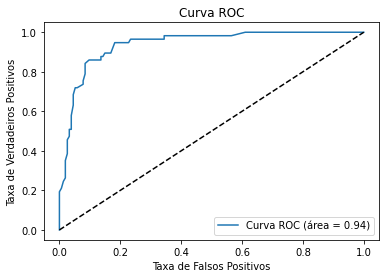

In [7]:
# ROC
y_scores = rf_classifier.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

# ROC plot
plt.plot(fpr, tpr, label='Curva ROC (área = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [8]:
count = Counter(y_train)
count

Counter({0: 584, 1: 259})

The minority class represents ~30% of the training set. The model is considered moderately imbalanced.

In [9]:
# Defining the number of folds for cross-validation
num_folds = 10

modelo = RandomForestClassifier()

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

scores = cross_val_score(modelo, X, y, cv=kf, scoring='accuracy')

print(f"Scoring of each fold: {scores}")

print(f"Average of cross validation: {scores.mean():.2f}")
print(f"Standard deviation of cross validation: {scores.std():.2f}")


Scoring of each fold: [0.90566038 0.86792453 0.83018868 0.88679245 0.86666667 0.9047619
 0.8952381  0.81904762 0.86666667 0.86666667]
Average of cross validation: 0.87
Standard deviation of cross validation: 0.03


# SHAP

In [10]:
explainer = shap.Explainer(rf_classifier.predict, X_test)
shap_values = explainer(X_train)

PermutationExplainer explainer: 844it [05:32,  2.48it/s]                         


In [11]:
sample_ind = 0  # Replace 0 with the index of the desired sample

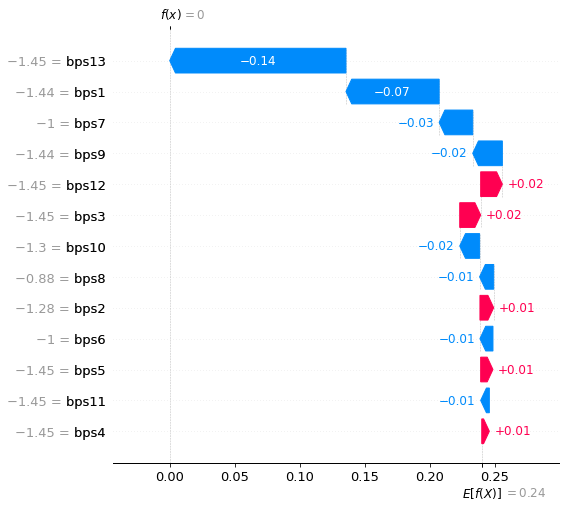

In [12]:
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

In [13]:
explainer = shap.TreeExplainer(rf_classifier)

shap_values = explainer.shap_values(X_train)

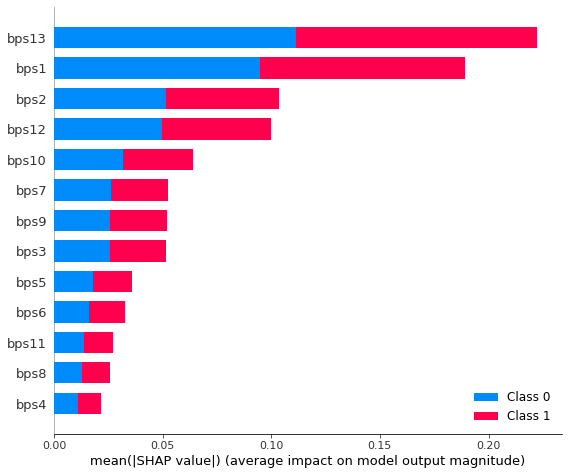

In [14]:
shap.summary_plot(shap_values, X_train)

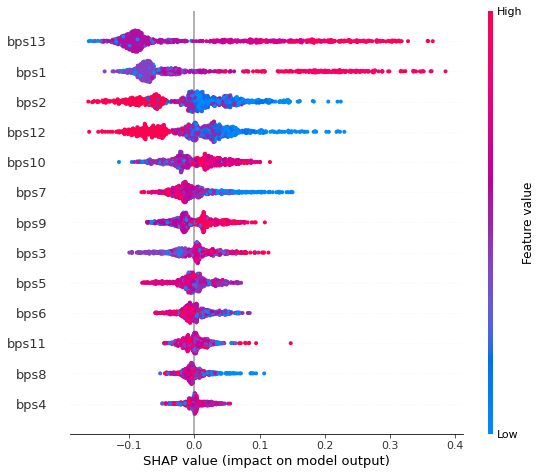

In [15]:
shap.summary_plot(shap_values[1], X_train)